In [1]:
%matplotlib inline
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn import metrics 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from scipy import stats
from sklearn.utils import column_or_1d
sb.set_style('whitegrid')


In [2]:

df_initial = pd.read_csv('D:\\Research\\Datasets\\CSVs\\results\\AmazeFileManager.csv',index_col='CommitHash')
df_initial['isBuggy'].value_counts()

0    1963
1     836
Name: isBuggy, dtype: int64

In [3]:
df = df_initial[(df_initial.ns > 0.0)  | (df_initial.nd > 0.0) | (df_initial.la > 0.0) | (df_initial.ld > 0.0) | (df_initial.nd > 0.0) | (df_initial.entrophy > 0.0)  | (df_initial.scoreFeature > 0.0)]
df['isBuggy'].value_counts()

0    1616
1     836
Name: isBuggy, dtype: int64

In [4]:
df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.groupby('isBuggy').mean()

ns        nd        nf  entrophy        la        ld        lt  \
isBuggy                                                                         
0.0      0.127210  0.004901  0.002575  0.074455  0.001471  0.001663  0.118363   
1.0      0.204545  0.005998  0.002665  0.170743  0.001443  0.001446  0.170901   

             ndev       age       nuc             ...               \
isBuggy                                           ...                
0.0      0.278620  0.423087  0.013144             ...                
1.0      0.334131  0.421694  0.050643             ...                

         scoreFeature  upVotesFeature  downVotesFeature  viewCountFeature  \
isBuggy                                                                     
0.0          0.187488        0.176519          0.120152          0.104537   
1.0          0.333760        0.314689          0.216670          0.189871   

         answerCountFeature  favoriteFeature  commentCount  \
isBuggy                                                      
0.0                0.069223         0.170999      0.053131   
1.0                0.125132         0.305199      0.096962   

         acceptedAnswerScoreFeature  maxScoreFeature  \
isBuggy                                                
0.0                        0.177738         0.174524   
1.0                        0.316346         0.311193   

         questionerReputationFeature  
isBuggy                               
0.0                         0.041353  
1.0                         0.073739  

[2 rows x 23 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, 504230dcbdcd0f023e1b4565ebfb82487fa6ac1f to cd84044ca6fd414bf4ab7073e900cb5c4b1283ce
Data columns (total 24 columns):
isBuggy                        2452 non-null float64
ns                             2452 non-null float64
nd                             2452 non-null float64
nf                             2452 non-null float64
entrophy                       2452 non-null float64
la                             2452 non-null float64
ld                             2452 non-null float64
lt                             2452 non-null float64
ndev                           2452 non-null float64
age                            2452 non-null float64
nuc                            2452 non-null float64
exp                            2452 non-null float64
rexp                           2452 non-null float64
sexp                           2452 non-null float64
scoreFeature                   2452 non-null float64
upVotesFeature              

#### Checking for independence between features

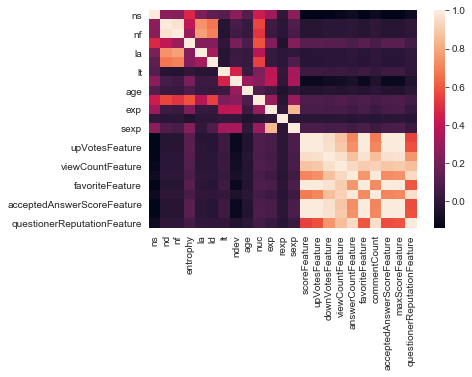

In [6]:
X = df.loc[:, df.columns != 'isBuggy']
sb.heatmap(X.corr())

# Using all features to predict defects

In [7]:
y = df.loc[:, df.columns == 'isBuggy']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size = .3, random_state=25)
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.92      0.85       472
        1.0       0.79      0.58      0.67       264

avg / total       0.79      0.79      0.78       736



# Using traditional features to predict defects

In [9]:
traditional_features = X.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
X_train, X_test, y_train, y_test = train_test_split(traditional_features, y.values.ravel(), test_size = .3, random_state=25)
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.77      0.92      0.84       472
        1.0       0.77      0.51      0.62       264

avg / total       0.77      0.77      0.76       736



# Using crowd features to predict defects

In [10]:
traditional_features = X.iloc[:,[13,14,15,16,17,18,19,20,21,22]]
X_train, X_test, y_train, y_test = train_test_split(traditional_features, y.values.ravel(), test_size = .3, random_state=25)
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.65      0.97      0.78       472
        1.0       0.53      0.06      0.11       264

avg / total       0.61      0.64      0.54       736

